# <font color=blue>TransE Algorithm</font>

**IGERT Trainees**: Roman Aguilera and Su Burtner <br>
**IGERT Mentor**: Yi Ding

##### Keywords: <font color=blue>embedding, multi-relational data, knowledge bases, Freebase</font>

### <font color=blue>Project Description</font>
    The goal of this project is to learn how to translate the TransE Algorithm presented in [this link](https://papers.nips.cc/paper/5071-translating-embeddings-for-modeling-multi-relational-data.pdf) into python source code.

### <font color=blue>Project Tasks</font>
    1. Data pre-processing: extract a subset of the Freebase data and import to python in the correct format & structures
    2. Algorithm implementation: translate a mathematical description of the algorithm in the original paper into python source code
    3. Visualization: plot the locations of the nodes over time
    
##### Software tools: <font color=blue>GitHub, jupyter</font>

### <font color=blue>Introduction</font>
#### TransE Algorithm

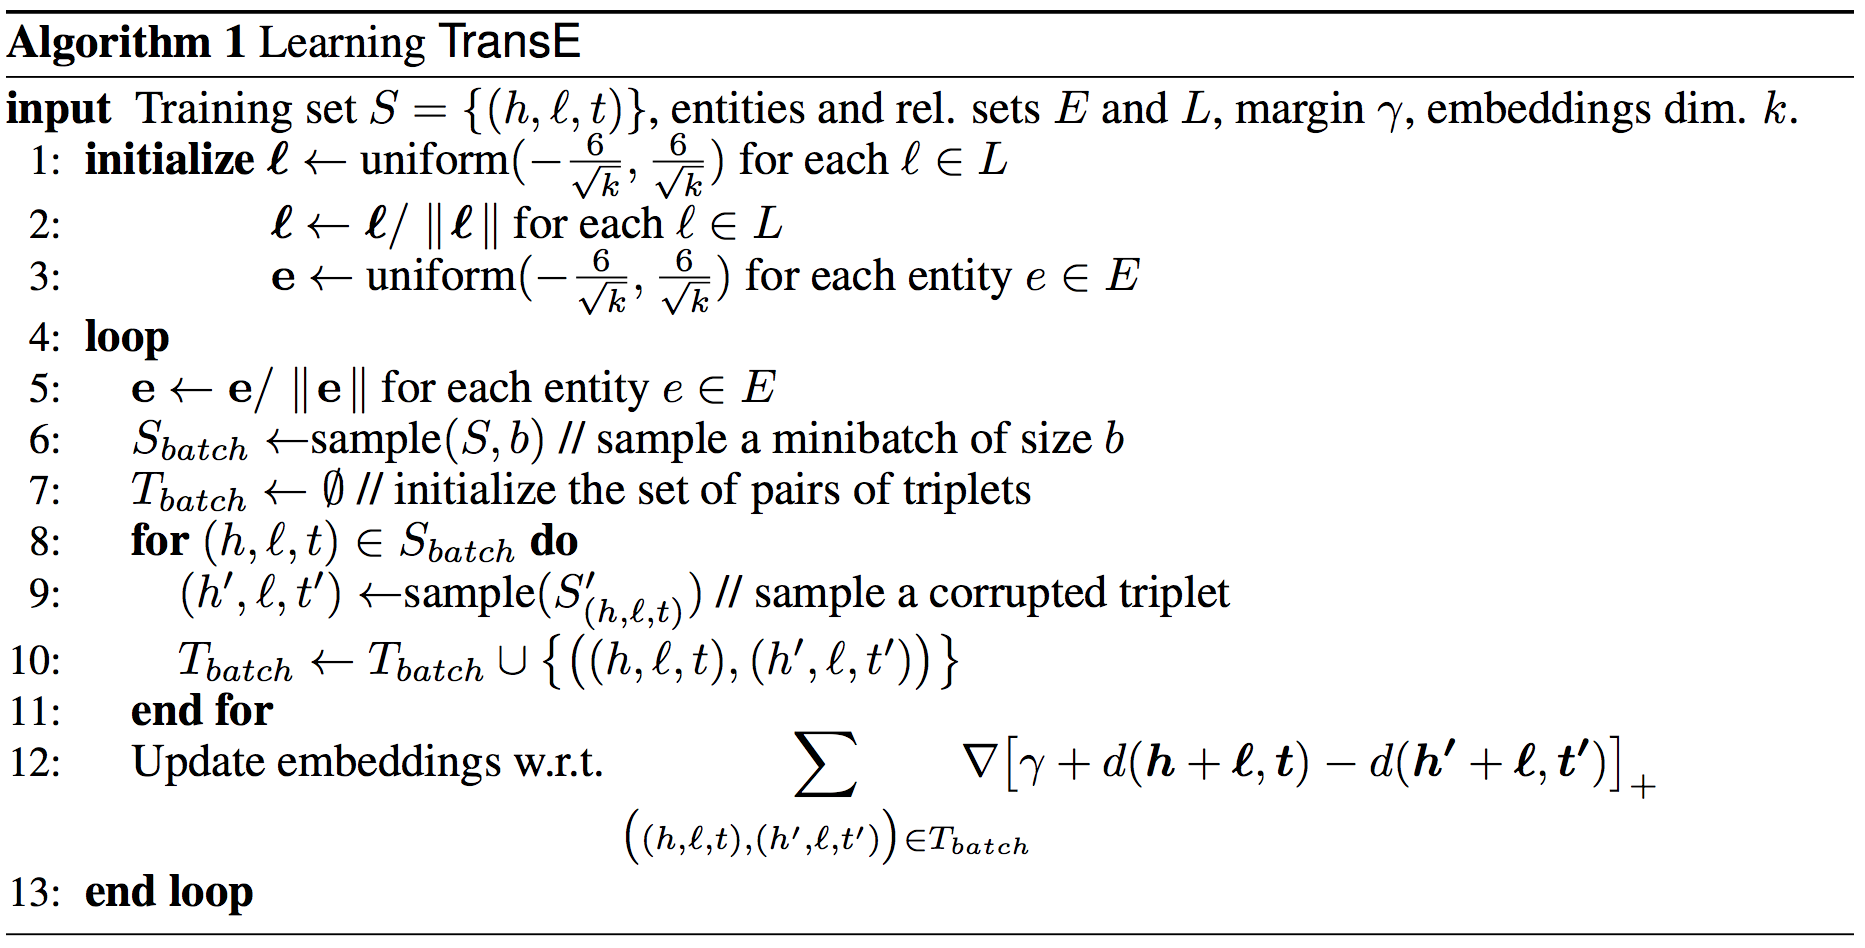


### <font color=blue>Methodology</font>

#### Import libraries:

In [4]:
import numpy as np
import pandas as pd

#### Read in the data and do some pre-processing:
    - Aspects of the data: tab delimited
    - Contents include
    
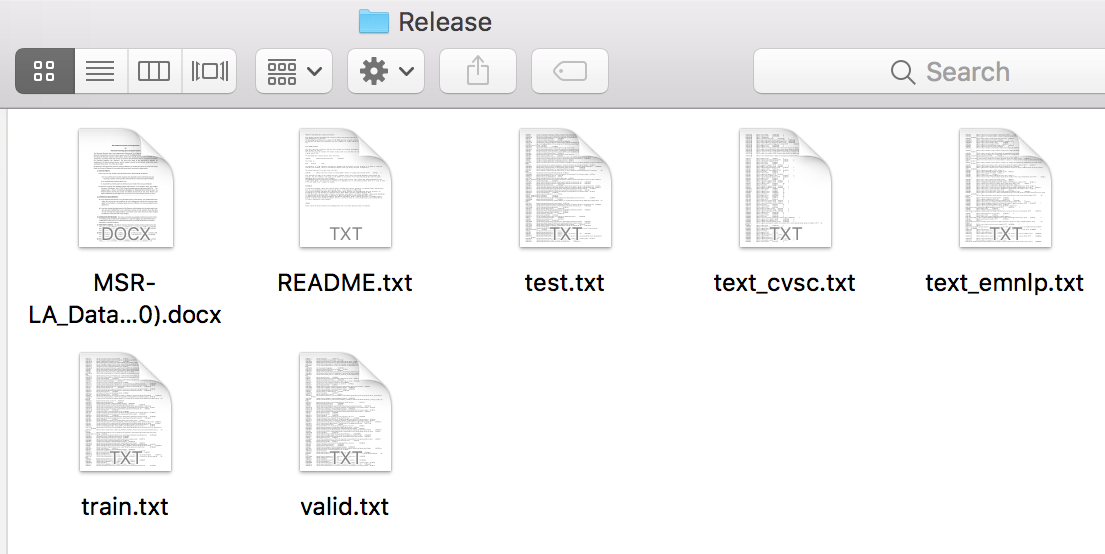
    
    - FYI: Actual entities and relationships on salinas at share/igert/student/sab00
    - We want to remove those relations that are too complicated, i.e., are more than just subj/rel/obj
    - We also need to join the subj/obj keys with their corresponding relations

In [5]:
base_dir = "/Users/sburtner/Documents/IGERT/Release/"
train_dat = pd.read_table(base_dir + "train.txt", sep="\t",
                          names=["subj", "rel", "obj"])
print("The training data file contains", len(train_dat), "triples.")
train_dat.head(10)

The training data contains 272115 triples.


,subj,rel,obj
0,/m/027rn,/location/country/form_of_government,/m/06cx9
1,/m/017dcd,/tv/tv_program/regular_cast./tv/regular_tv_app...,/m/06v8s0
2,/m/07s9rl0,/media_common/netflix_genre/titles,/m/0170z3
3,/m/01sl1q,/award/award_winner/awards_won./award/award_ho...,/m/044mz_
4,/m/0cnk2q,/soccer/football_team/current_roster./sports/s...,/m/02nzb8
5,/m/04nrcg,/soccer/football_team/current_roster./soccer/f...,/m/02sdk9v
6,/m/07nznf,/film/actor/film./film/performance/film,/m/014lc_
7,/m/02qyp19,/award/award_category/nominees./award/award_no...,/m/02d413
8,/m/0q9kd,/award/award_nominee/award_nominations./award/...,/m/0184jc
9,/m/03q5t,/music/performance_role/regular_performances./...,/m/07y_7


In [160]:
obama = train_dat[(train_dat["subj"] == "/m/02mjmr") |
                  (train_dat["obj"] == "/m/02mjmr")]
obama.head(10)

,subj,rel,obj
1669,/m/013zdg,/education/educational_degree/people_with_this...,/m/02mjmr
2227,/m/0f8l9c,/base/popstra/location/vacationers./base/popst...,/m/02mjmr
3104,/m/02mjmr,/government/politician/government_positions_he...,/m/060c4
8849,/m/0d05fv,/base/popstra/celebrity/friendship./base/popst...,/m/02mjmr
10874,/m/02mjmr,/people/person/profession,/m/0kyk
15089,/m/01w5m,/education/educational_institution/students_gr...,/m/02mjmr
15154,/m/0d06vc,/base/culturalevent/event/entity_involved,/m/02mjmr
29945,/m/02mjmr,/celebrities/celebrity/celebrity_friends./cele...,/m/01l9p
40409,/m/0151w_,/celebrities/celebrity/celebrity_friends./cele...,/m/02mjmr
45983,/m/0413cff,/film/film/personal_appearances./film/personal...,/m/02mjmr


#### Take a subset of the data based on the 3 most common triples:

In [6]:
subj_tab = train_dat.filter(items=["subj", "rel"])
subj_tab = subj_tab.rename(index=str, columns={"subj": "ent"})

obj_tab = train_dat.filter(items=["obj", "rel"])
obj_tab = obj_tab.rename(index=str, columns={"obj": "ent"})

ent_tab = pd.concat([subj_tab, obj_tab])
freq_tab = ent_tab[["ent", "rel"]].groupby(["rel"]).agg("count").sort_values("ent", ascending=False)
freq_tab.head(10)

,ent
rel,
/award/award_nominee/award_nominations./award/award_nomination/award_nominee,31978
/film/film/release_date_s./film/film_regional_release_date/film_release_region,25786
/award/award_nominee/award_nominations./award/award_nomination/award,24314
/people/person/profession,21890
/film/actor/film./film/performance/film,18988
/award/award_category/nominees./award/award_nomination/nominated_for,18930
/award/award_winner/awards_won./award/award_honor/award_winner,16846
/film/film/genre,14536
/award/award_nominee/award_nominations./award/award_nomination/nominated_for,12554


In [341]:
film_rel = freq_tab.index[0:3]
print(film_rel)
print("The training data now contains", sum(film_rel[0:3]), "triples.")

Index(['/award/award_nominee/award_nominations./award/award_nomination/award_nominee',
       '/film/film/release_date_s./film/film_regional_release_date/film_release_region',
       '/award/award_nominee/award_nominations./award/award_nomination/award'],
      dtype='object', name='rel')


#### Initialize data:

In [353]:
S = train_dat[train_dat["rel"].isin(film_rel)]
R = pd.DataFrame(film_rel) # dataframe
E = pd.DataFrame(ent_tab[ent_tab["rel"].isin(film_rel)]["ent"].drop_duplicates()) # dataframe

rand_uni = lambda x: np.random.uniform(-6/np.sqrt(2), 6/np.sqrt(2), size=len(x))

R["randx"] = rand_uni(R) # Line 1
R["randy"] = rand_uni(R) # Line 1

R["rx"] = R["randx"]/np.sqrt(R["randx"]**2 + R["randy"]**2) # Line 2
R["ry"] = R["randy"]/np.sqrt(R["randx"]**2 + R["randy"]**2) # Line 2

E["randx"] = rand_uni(E) # Line 3
E["randy"] = rand_uni(E) # Line 3

E["ex"] = E["randx"]/np.sqrt(E["randx"]**2 + E["randy"]**2) # Line 5
E["ey"] = E["randy"]/np.sqrt(E["randx"]**2 + E["randy"]**2) # Line 5

R = R.drop(["randx", "randy"], axis=1)
E = E.drop(["randx", "randy"], axis=1)

S_train = pd.merge(S, R, on="rel")
S_train.head(10)
S_train = pd.merge(S_train, E, left_on="subj", right_on="ent").drop("ent", axis=1)
S_train = S_train.rename(index=str, columns={"ex": "sx"})
S_train = S_train.rename(index=str, columns={"ey": "sy"})
S_train = pd.merge(S_train, E, left_on="obj", right_on="ent").drop("ent", axis=1)
S_train = S_train.rename(index=str, columns={"ex": "ox"})
S_train = S_train.rename(index=str, columns={"ey": "oy"})
R.head()

,rel,rx,ry
0,/award/award_nominee/award_nominations./award/...,0.604542,-0.796573
1,/film/film/release_date_s./film/film_regional_...,-0.776953,0.629559
2,/award/award_nominee/award_nominations./award/...,-0.376878,0.926263


#### Start a minibatch (assume this is the first epoch):

In [ ]:

def mbatch(train_dat, R, E, batch_size):
    # Sample a minibatch, with size "batch_size"
    # Initialize Tbatch 
    Tbatch = {}
    for i in range(1:batch_size):
        # Sample a triplet
        # Create the set or list of corrupted triplets, we do just the head
        # Need to make sure that the corrupted triplets created DO NOT exist in the training data
        # Sample a corrupted triplet
        # Start a for loop for each of the corrupted triples
        Tbatch = Tbatch.append(corrupted_triplet)
        # Input is rx, ry, sx, sy, ox, oy
        # #%#^#&#*# Call Roman's function for one triplet and one corrupted triplet
        # Repeat for the rest of the triplets in the minibatch

    

#### Visualize the graph:

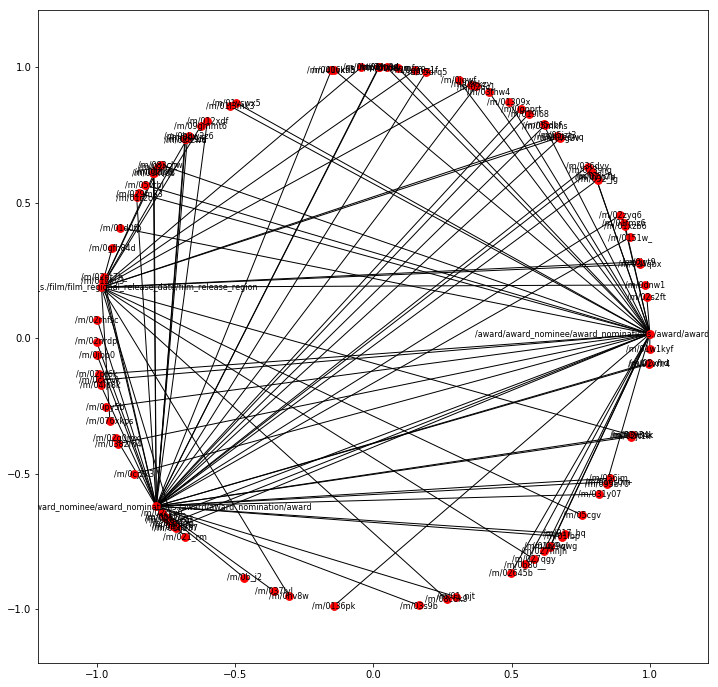

In [335]:
import networkx as nx
import matplotlib.pyplot as plt

viz = pd.merge(ent_tab.drop_duplicates(), R, on="rel", how="inner")
viz = pd.merge(viz, E, on="ent", how="inner")
viz = viz.sample(100)

Rviz = R.rename(index=str, columns={"rel":"name", "rx":"x", "ry":"y"})
Eviz = E.rename(index=str, columns={"ent":"name", "ex":"x", "ey":"y"})
RE = [Rviz, Eviz]

npos = pd.concat(RE).set_index("name").T.to_dict("list")
rpos = Rviz.set_index("name").T.to_dict("list")
epos = Eviz.set_index("name").T.to_dict("list")

G = nx.from_pandas_dataframe(viz, "rel", "ent", create_using=nx.MultiGraph())
plt.figure(figsize=(12,12)) 
nx.draw_networkx(G, npos, node_size=60, font_size=8)
plt.show()

In [346]:
#plt.figure(figsize=(12,12)) 
#nx.draw_networkx(G, node_size=60, font_size=8)
#plt.show()

In [331]:
import sympy as sp

def myfun(first, second, value):
    x = sp.symbols(first)
    y = sp.symbols(second)
    
    easy = x**3 + y**2
    out = sp.diff(easy, x)
        
    f = out
    return(f.subs({x:value}))

myfun("b", "c" , 4)


48